In [27]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Load the dataset
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

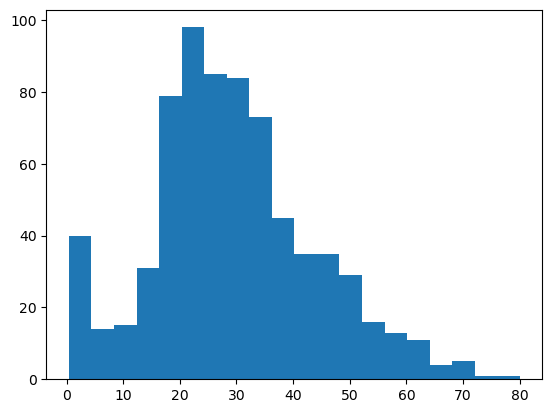

In [29]:
# Show age distribution
plt.hist(train['Age'], bins=20)
plt.show()

## Data Preprocessing

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64


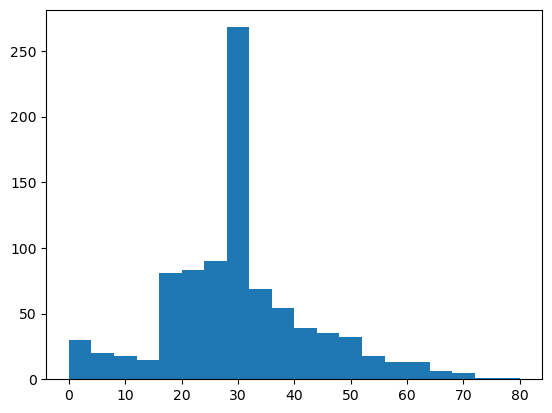

In [30]:
# Set the sex column to binary
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])

# Set the NaN values of age to the mean of the age
train.fillna({'Age': train['Age'].mean()}, inplace=True)
test.fillna({'Age': train['Age'].mean()}, inplace=True)

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

print(train['Age'])
plt.hist(train['Age'], bins=20)
plt.show()

Extraigo los títulos de los nombres y los coloco en una nueva columna, luego agrupo los títulos en nombres más comunes y elimino la columna del nombre.

In [31]:
# Get all the titles
titles = train['Name'].str.extract(r'([A-Za-z]+)\.')
titles_test = test['Name'].str.extract(r'([A-Za-z]+)\.')

# Add the titles to the dataset
train['Title'] = titles
test['Title'] = titles_test

# Replace the titles with a more common name
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Mme'], 'Mrs')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Jonkheer', 'Capt'], 'Special')

# Replace the titles with a more common name in the test dataset
test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Mme'], 'Mrs')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Don', 'Jonkheer', 'Capt'], 'Special')


# Convert the titles to numbers
train['Title'] = label_encoder.fit_transform(train['Title'])
test['Title'] = label_encoder.fit_transform(test['Title'])

# Delete the name column
train = train.drop(columns=['Name'])
test = test.drop(columns=['Name'])

print(train['Title'].head(50))

print(train.head())

0     2
1     3
2     1
3     3
4     2
5     2
6     2
7     0
8     3
9     3
10    1
11    1
12    2
13    2
14    1
15    3
16    0
17    2
18    3
19    3
20    2
21    2
22    1
23    2
24    1
25    3
26    2
27    2
28    1
29    2
30    5
31    3
32    1
33    2
34    2
35    2
36    2
37    2
38    1
39    1
40    3
41    3
42    2
43    1
44    1
45    2
46    2
47    1
48    2
49    3
Name: Title, dtype: int64
   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch            Ticket  \
0            1         0       3    1   22      1      0         A/5 21171   
1            2         1       1    0   38      1      0          PC 17599   
2            3         1       3    0   26      0      0  STON/O2. 3101282   
3            4         1       1    0   35      1      0            113803   
4            5         0       3    1   35      0      0            373450   

      Fare Cabin Embarked  Title  
0   7.2500   NaN        S      2  
1  71.2833   C85        C      3  


Extraigo la primer letra de la cabina y lo coloco en una nueva columna, luego elimino la columna de la cabina.

In [32]:
# Get the first letter of the cabin
train['Cabin_letter'] = train['Cabin'].str[0]
test['Cabin_letter'] = test['Cabin'].str[0]

# Drop the cabin column
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

# Drop the ticket column
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])


In [33]:
# Convert the cabin letter to a number
train['Cabin_letter'] = label_encoder.fit_transform(train['Cabin_letter'].fillna('Z'))
test['Cabin_letter'] = label_encoder.fit_transform(test['Cabin_letter'].fillna('Z'))

# Convert the embarked column to a number
train['Embarked'] = label_encoder.fit_transform(train['Embarked'].fillna('S'))
test['Embarked'] = label_encoder.fit_transform(test['Embarked'].fillna('S'))

In [34]:
print(train.head())
print(train['Survived'].shape)
print(train.drop(columns=['Survived']).shape)

   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1   22      1      0   7.2500         2   
1            2         1       1    0   38      1      0  71.2833         0   
2            3         1       3    0   26      0      0   7.9250         2   
3            4         1       1    0   35      1      0  53.1000         2   
4            5         0       3    1   35      0      0   8.0500         2   

   Title  Cabin_letter  
0      2             8  
1      3             2  
2      1             8  
3      3             2  
4      2             8  
(891,)
(891, 10)


In [35]:
# Split the dataset into train and test
X = train.drop(columns=['Survived'])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation and Train

### Modelo 1
Creo un modelo con 3 capas, la primera con 10 neuronas y activación relu, la segunda con 10 neuronas y activación relu y la tercera con 1 neurona y activación sigmoid.

In [36]:
# Creates the model
model = keras.models.Sequential(
    [
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5075 - fn: 73.8947 - fp: 75.1053 - loss: 6.2915 - precision: 0.3631 - recall: 0.4464 - tn: 123.5789 - tp: 45.0000 - val_accuracy: 0.6783 - val_fn: 37.0000 - val_fp: 9.0000 - val_loss: 1.5407 - val_precision: 0.5909 - val_recall: 0.2600 - val_tn: 84.0000 - val_tp: 13.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6040 - fn: 77.9474 - fp: 47.6316 - loss: 1.6106 - precision: 0.4913 - recall: 0.3041 - tn: 147.2632 - tp: 44.7368 - val_accuracy: 0.6713 - val_fn: 39.0000 - val_fp: 8.0000 - val_loss: 0.9780 - val_precision: 0.5789 - val_recall: 0.2200 - val_tn: 85.0000 - val_tp: 11.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6001 - fn: 64.1053 - fp: 60.3684 - loss: 1.0427 - precision: 0.5298 - recall: 0.4749 - tn: 132.2632 - tp: 60.8421 - val_accuracy: 0.6853 - val_fn: 37.0000 - val_fp: 8.0000 - val_loss: 0.6205 - val_precision: 0.6190 - val_recall: 0.2600 - val_tn: 85.0000 - val_

In [38]:
# Save the model
model.save('./models/titanicModel01.keras')

# Load the model
loaded_model = keras.models.load_model('./models/titanicModel01.keras')

# Predict the test dataset
predictions = model.predict(test)

# Save the predictions
np.savetxt('predictions.csv', predictions, delimiter=',')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [39]:
# Evaluate the model in the train dataset
evaluation = model.evaluate(X_train, y_train)

# Lista de nombres de las métricas
metric_names = ["loss", "fn", "fp", "tn", "tp", "precision", "recall", "accuracy"]

# Mostrar cada métrica con su nombre y valor correspondiente
for metric_name, metric_value in zip(metric_names, evaluation):
    print(f"{metric_name}: {metric_value:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - fn: 89.4167 - fp: 7.0000 - loss: 0.5109 - precision: 0.9051 - recall: 0.4114 - tn: 237.5000 - tp: 62.7500  
loss: 0.5053
fn: 159.0000
fp: 14.0000
tn: 430.0000
tp: 109.0000
precision: 0.8862
recall: 0.4067
accuracy: 0.7570


In [44]:
# Predict the train dataset
y_pred_prob = model.predict(X_train)

y_pred = (y_pred_prob > 0.5).astype(int)  # Convierte probabilidades a 0 o 1


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


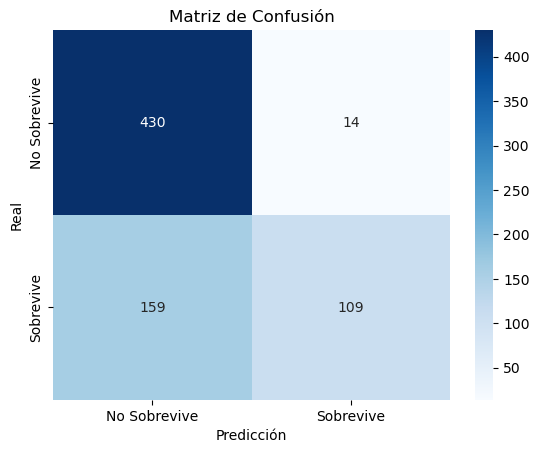

Accuracy: 0.7570
Precision: 0.8862
Recall: 0.4067
F1 Score: 0.5575


In [45]:

cm = confusion_matrix(y_train, y_pred)

#get the accuracy
accuracy = accuracy_score(y_train, y_pred)

# Get the precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Get the recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Get the f1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

print(f'Precision: {precision:.4f}')

print(f'Recall: {recall:.4f}')

print(f'F1 Score: {f1:.4f}')


In [46]:
# Evaluate the model in the test dataset
evaluation = model.evaluate(X_test, y_test)

# Lista de nombres de las métricas
metric_names = ["loss", "fn", "fp", "tn", "tp", "precision", "recall", "accuracy"]

# Mostrar cada métrica con su nombre y valor correspondiente
for metric_name, metric_value in zip(metric_names, evaluation):
    print(f"{metric_name}: {metric_value:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7734 - fn: 26.4286 - fp: 0.7143 - loss: 0.4879 - precision: 0.9744 - recall: 0.4646 - tn: 69.8571 - tp: 22.7143   
loss: 0.5065
fn: 41.0000
fp: 1.0000
tn: 104.0000
tp: 33.0000
precision: 0.9706
recall: 0.4459
accuracy: 0.7654


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


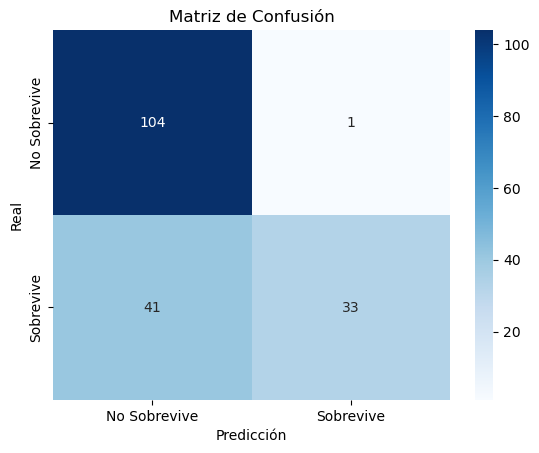

Accuracy: 0.7654
Precision: 0.9706
Recall: 0.4459
F1 Score: 0.6111


In [48]:
# Predict the test dataset
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)  # Convierte probabilidades a 0 o 1

cm = confusion_matrix(y_test, y_pred)

#get the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get the precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Get the recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Get the f1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

print(f'Precision: {precision:.4f}')

print(f'Recall: {recall:.4f}')

print(f'F1 Score: {f1:.4f}')


### Modelo 2

In [49]:
# Creates the model
model = keras.models.Sequential(
    [
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(5, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.summary()

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
]

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

model.fit(X_train, y_train, validation_split=0.2, epochs=500)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5634 - fn: 81.2632 - fp: 55.8421 - loss: 7.9316 - precision: 0.3974 - recall: 0.3925 - tn: 142.4211 - tp: 38.0526 - val_accuracy: 0.6503 - val_fn: 50.0000 - val_fp: 0.0000e+00 - val_loss: 0.6771 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 93.0000 - val_tp: 0.0000e+00
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5978 - fn: 120.1053 - fp: 6.4211 - loss: 0.9251 - precision: 0.2831 - recall: 0.0232 - tn: 188.2105 - tp: 2.8421 - val_accuracy: 0.6503 - val_fn: 50.0000 - val_fp: 0.0000e+00 - val_loss: 0.6680 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 93.0000 - val_tp: 0.0000e+00
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - fn: 122.1053 - fp: 7.0526 - loss: 0.8542 - precision: 0.3551 - recall: 0.0350 - tn: 184.7895 - tp: 3.6316 - val_accuracy: 0.6503 - val_fn: 50.0000 - val_fp: 0.0000e+00 - val_loss: 0.6618 - val_precision: 0.0000e+00 - val_rec

In [51]:
# Save the model
model.save('./models/titanicModel02.keras')

# Predict the test dataset
predictions = model.predict(test)

# Save the predictions
np.savetxt('predictions.csv', predictions, delimiter=',')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [52]:
# Load the model
loaded_model = keras.models.load_model('./models/titanicModel02.keras')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/tmp/ipykernel_5057/1598603662.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])


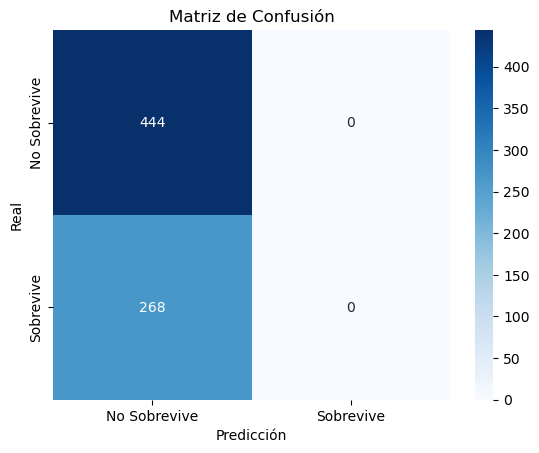

Accuracy: 0.6236
Precision: nan
Recall: 0.0000
F1 Score: nan


In [53]:
# Predict the train dataset
y_pred_prob = model.predict(X_train)

y_pred = (y_pred_prob > 0.5).astype(int)  # Convierte probabilidades a 0 o 1

cm = confusion_matrix(y_train, y_pred)

#get the accuracy
accuracy = accuracy_score(y_train, y_pred)

# Get the precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Get the recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Get the f1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

print(f'Precision: {precision:.4f}')

print(f'Recall: {recall:.4f}')

print(f'F1 Score: {f1:.4f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/tmp/ipykernel_5057/1784356105.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])


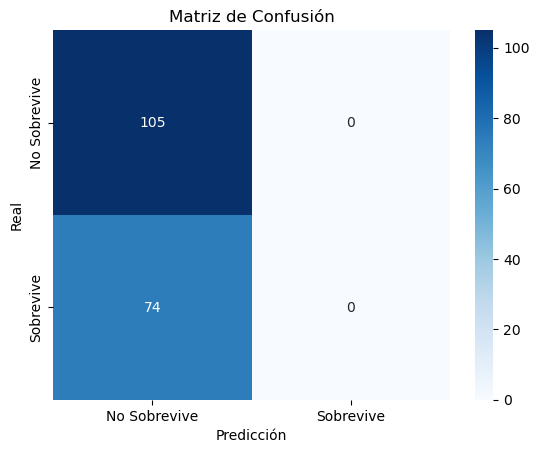

Accuracy: 0.5866
Precision: nan
Recall: 0.0000
F1 Score: nan


In [54]:
# Predict the test dataset
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)  # Convierte probabilidades a 0 o 1

cm = confusion_matrix(y_test, y_pred)

#get the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Get the precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Get the recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Get the f1 score
f1 = 2 * (precision * recall) / (precision + recall)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

print(f'Precision: {precision:.4f}')

print(f'Recall: {recall:.4f}')

print(f'F1 Score: {f1:.4f}')

### Aplico Bootstrap

In [56]:
n_iterations = 10  # Número de muestras bootstrap
n_size = int(len(X_train) * 0.8)  # Tamaño de cada muestra bootstrap (80% de los datos originales)

accuracies = []  # Para guardar las métricas de rendimiento de cada modelo

for i in range(n_iterations):
    # Crear una muestra bootstrap con reemplazo
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, n_samples=n_size, random_state=i)

    # Crear y entrenar el modelo
    model = keras.models.Sequential(
        [
            keras.layers.Dense(10, activation='relu'),
            keras.layers.Dense(10, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ]
    )
    model.compile(optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics)
    model.fit(X_train_bootstrap, y_train_bootstrap, epochs=50, verbose=0)

    # Evaluar el modelo en las muestras "out-of-bag" (no seleccionadas en bootstrap)
    X_test_oob = X_train.loc[~X.index.isin(X_train_bootstrap.index)]
    y_test_oob = y_train.loc[~y.index.isin(y_train_bootstrap.index)]

    if len(X_test_oob) > 0:  # Si hay suficientes muestras fuera del bootstrap
        y_pred_oob = model.predict_classes(X_test_oob)
        accuracy = accuracy_score(y_test_oob, y_pred_oob)
        accuracies.append(accuracy)
        print(f'Bootstrap {i+1}, OOB Accuracy: {accuracy:.4f}')

# Promediar las métricas de las muestras bootstrap
mean_accuracy = np.mean(accuracies)
print(f'Mean OOB Accuracy: {mean_accuracy:.4f}')


IndexError: Boolean index has wrong length: 891 instead of 712